In [18]:
# Cannot run in jupyter labs, use notebook
# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o /home/julian/repositories/RTK_on_the_beach/conf/csingle.conf
posbank

<PositionBank(Thread-9, started daemon 140230515357440)>

In [1]:
from posbankthread import PositionBank, DarknessMeasureFlash
posbank = PositionBank(port="random")
#posbank = PositionBank()
posbank.start()
# posbank.sockerrfile.close()

<IPython.core.display.Javascript object>


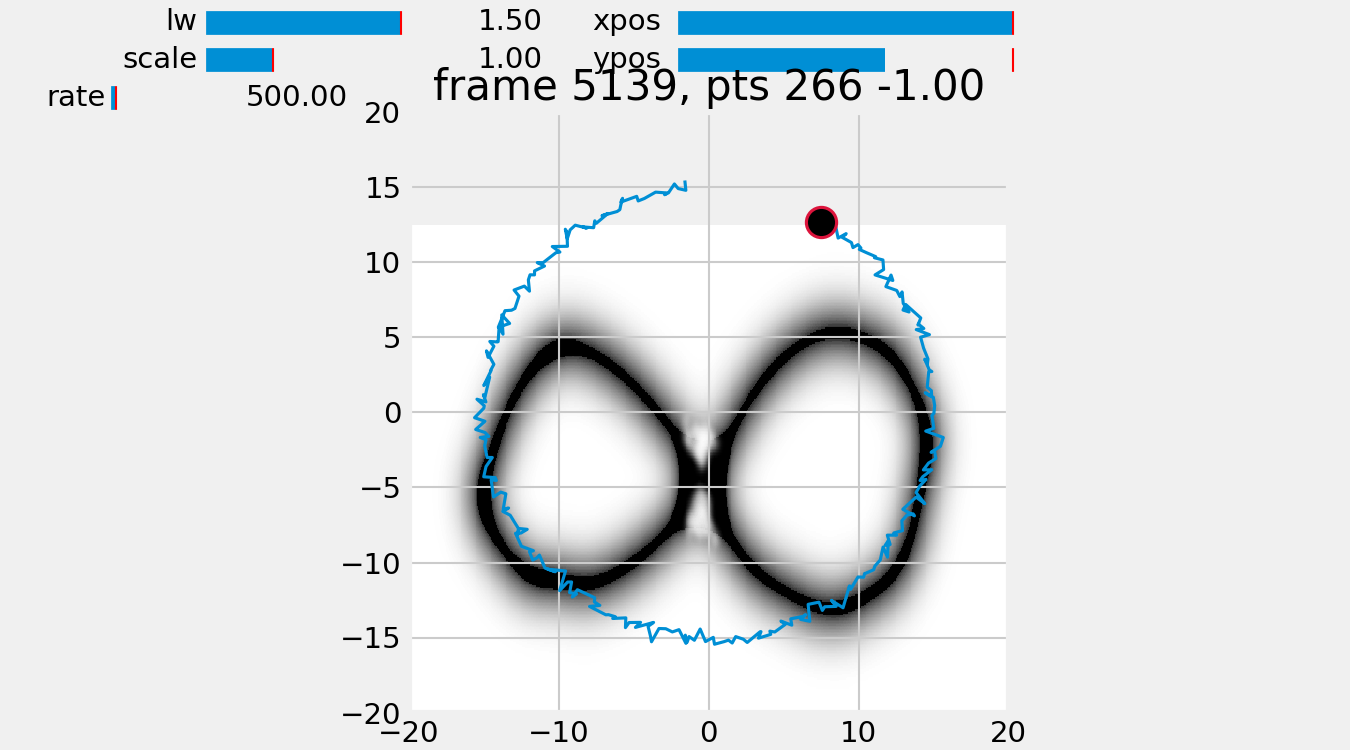

flash connecting
flash b'Hello from Android thread 4\n'


In [2]:
%matplotlib notebook

import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import math

matplotlib.style.use('fivethirtyeight')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(9,5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
playradmetres = 20 
playimg = matplotlib.image.imread('../shape2.png')

# hard code the relative positions of the axes we draw in here
linewidthsliderax = fig.add_axes([0.15, 0.95, 0.20, 0.04], label="controls") # [left,bottom,width,height] as a proportion
bgscalesliderax = fig.add_axes([0.15, 0.90, 0.20, 0.04], label="scale")
bgxpossliderax = fig.add_axes([0.5, 0.95, 0.5, 0.04], label="xposslider")
bgypossliderax = fig.add_axes([0.5, 0.90, 0.5, 0.04], label="yposslider")
updateratesliderax = fig.add_axes([0.08, 0.85, 0.1, 0.04], label="updaterate")

gax = fig.add_axes([0.05, 0.05, 0.95, 0.8], "graphics")
#gax.set_aspect("equal")

trackline, = gax.plot([], [], lw=1)
trackpoint, = gax.plot([], [], marker="o", color="crimson", ms=15)
trackpointC, = gax.plot([], [], marker="o", color="crimson", ms=12)
imgplot = gax.imshow(playimg)
imgplot.set_extent((-playradmetres, playradmetres, -playradmetres, playradmetres))

dmeasf = DarknessMeasureFlash(posbank.queuepoints, imgplot)
dmeasf.start()

gax.set_xlim((-playradmetres, playradmetres))
gax.set_ylim((-playradmetres, playradmetres))


def init():
    trackline.set_data([], [])
    return trackline,

def updateframe(i):
    k = posbank.pdposarray.iloc[:posbank.n]
    trackline.set_data(k.x, k.y)
    trackpoint.set_data(posbank.x, posbank.y)
    trackpointC.set_data(posbank.x, posbank.y)
    
    fp = dmeasf.getunderpixelQ(posbank.x, posbank.y)

    v = max(0, min(255, int(255*fp)))
    col = "#%.2x%.2x%.2x" % (v,v,v)
    trackpointC.set_color(col)
    gax.set_title("frame %d, pts %d %0.2f" % (i, posbank.n, fp))
    return trackline,

def updatefromcontrols(XX):
    trackline.set_linewidth(linewidthslider.val)
    xpos = bgxposslider.val
    ypos = bgyposslider.val
    scale = bgscaleslider.val
    imgplot.set_extent((-playradmetres*scale+xpos, playradmetres*scale+xpos, 
                        -playradmetres*scale+ypos, playradmetres*scale+ypos))
    
def updateframerate(XX):
    anim.event_source.interval = updaterateslider.val
    
linewidthslider = matplotlib.widgets.Slider(linewidthsliderax, 'lw', 0.1, 2, valinit=1.5)
bgscaleslider = matplotlib.widgets.Slider(bgscalesliderax, 'scale', 0.3, 3, valinit=1.0)
bgxposslider = matplotlib.widgets.Slider(bgxpossliderax, 'xpos', -playradmetres, playradmetres, valinit=0)
bgyposslider = matplotlib.widgets.Slider(bgypossliderax, 'ypos', -playradmetres, playradmetres, valinit=0)
updaterateslider = matplotlib.widgets.Slider(updateratesliderax, 'rate', 200, 5000, valinit=500)

linewidthslider.on_changed(updatefromcontrols)
bgscaleslider.on_changed(updatefromcontrols)
bgxposslider.on_changed(updatefromcontrols)
bgyposslider.on_changed(updatefromcontrols)
anim = matplotlib.animation.FuncAnimation(fig, updateframe, init_func=init, interval=200, blit=True)
updaterateslider.on_changed(updateframerate)
updatefromcontrols(0)

plt.show()
#cur_axes.axes.get_xaxis().set_visible(False)

# put altitude here too

In [4]:
# to suppress this thread
import queue
#dmeasf.queuepoints = queue.Queue(1)

In [25]:
dmeasf.queuepoints

In [9]:
dmeasf.socketconnectedFlash.settimeout(1000)

In [40]:
import socket
socketconnectedFlash = socket.socket()
socketconnectedFlash.settimeout(2)
print(socket.getaddrinfo("192.168.43.2", 9042))
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.2", 9042)[0][-1])


[(<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_STREAM: 1>, 6, '', ('192.168.43.2', 9042)), (<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_DGRAM: 2>, 17, '', ('192.168.43.2', 9042)), (<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_RAW: 3>, 0, '', ('192.168.43.2', 9042))]


timeout: timed out

In [34]:
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
sockerrfileFlash.readline()


b'Hello from Android thread 6\n'

In [47]:
dmeasf.queuepoints.qsize(), dmeasf.exceptioncount, dmeasf.lastexception, dmeasf

(0,
 23,
 ConnectionResetError(104, 'Connection reset by peer'),
 <DarknessMeasureFlash(Thread-5, started daemon 139643717306112)>)

True

In [17]:
dmeasf.exceptioncount, dmeasf.lastexception

(18, socket.timeout('timed out'))

In [23]:
dmeasf

<DarknessMeasureFlash(Thread-5, started daemon 139643717306112)>

<IPython.core.display.Javascript object>


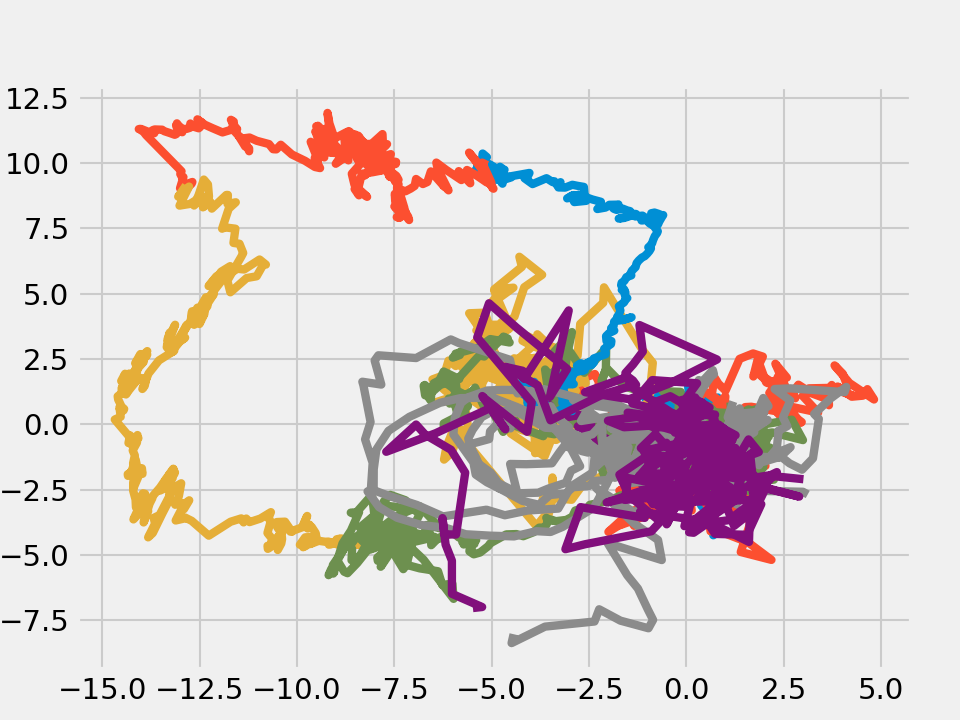

In [7]:
for l in posbank.pdposarrays:
    plt.plot(l.x, l.y)

In [3]:
fdir = "/home/julian/data/hanglog/20190413125238crosby"
fdir = "/home/julian/data/hanglog/20190413123020crosby1"
fdir = "/home/julian/data/hanglog/20190413191745"

convbinexe = "/home/julian/extrepositories/RTKLIB-rtkexplorer/app/convbin/gcc/convbin"

# Copy the files across from the phone
import os, subprocess
for f in os.listdir(fdir):
    if f[-4:] == '.ubx':
        print("\nconvbin on", f)
        k = subprocess.run([convbinexe, os.path.join(fdir, f)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(k.stderr.decode())
        print(k.stdout.decode())
        
# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/convbin/gcc/convbin


convbin on hdata-2019-04-13_19-17-45C.ubx
input file  : /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.ubx (u-blox)
->rinex obs : /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.obs
->rinex nav : /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.nav
->rinex gnav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.gnav
->rinex hnav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.hnav
->rinex qnav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.qnav
->rinex lnav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.lnav
->rinex cnav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.cnav
->rinex inav: /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.inav
->sbas log  : /home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.sbs


: 



convbin on hdata-2019-04-13_19-17-45A.ubx
input file  : /home/julian/data/

In [23]:
import subprocess
#help(subprocess.run)
k = subprocess.run(["ls", ".."], stdout=subprocess.PIPE)

In [24]:
k.stdout

b'conf\nlabstest.ipynb\nLICENSE\nnotebooks\nREADME.md\nrtkrcv_201904031828.trace\nrtkrcv_201904061551.trace\nrtkrcv.nav\nshape1.png\n'

In [6]:
fname = "/home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.ubx"
fin = open(fname, "rb")
fin.read(100)
#fin = open("/home/julian/data/hanglog/20190413125238crosby/hdata-2019-04-13_12-52-38A.ubx", "rb")
fin.read(100)


b'\xa8c!\xb9\xb5b\x010\x14\x008c\x00\x00\x01\x04\x00\x00\x00\x05\x10\x03\x08\xa5\x00\x00\x00\x00\x00\x00\xaa\xda\xb5b\x01"\x14\x008c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff|69\x00\xb9\x81\xb5b\x02\x15\x10\x00\x9a\x99\x99\x99\x99\x998@\x00\x00\x11\x00\x00\x01pd\x1cm\xb5b\x010\x14\x00\x00d\x00\x00\x01\x04\x00\x00\x00\x05'

In [32]:
set(fin.read(1000))

{'\x00'}

In [170]:
import socket
socketconnectedFlash = socket.socket()
print("flash connecting")
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
row = sockerrfileFlash.readline()
print("flash", row)
socketconnectedFlash.send(b"+AAA")
row = sockerrfileFlash.readline()
print("hhh", row)


flash connecting
flash b'Hello from Android thread 41\n'
hhh b''


In [169]:
fp = 0.8
if fp == -1:
    timeradd, timerlight = 20, 80
else:
    timeradd = 30 + fp*(250-30)
    timerlight = 60 + fp*(600-60)
socketconnectedFlash.send(b"%d %d\n" % (timeradd, timerlight))


8

In [93]:
import socket
socketconnectedFlash = socket.socket()
print("flash connecting")
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
row = sockerrfileFlash.readline()
print("flash", row)
socketconnectedFlash.send(b"-CCC")


flash connecting
flash b'Hello from Android thread 28\n'


4

In [ ]:
sockerrfileFlash.read(100)